## 0. Installation

Install the SDV community

In [ ]:
%pip install sdv

## 1. Loading the libraries

In [22]:
from sdv.datasets.demo import download_demo
from sdv.single_table import CTGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality, get_column_plot, get_column_pair_plot
import time

## 2. Loading the data

In [23]:
real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='census_extended'
)
len(real_data)
real_data.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,dob,address,pob
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1980-11-07,"058 Wilson Inlet Apt. 470\nLake Miguel, FL 06513","Washington, D.C."
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1969-08-20,"9915 Andrew Road\nEricashire, NC 38090","Washington, D.C."
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1982-06-03,"4656 Tammy Terrace\nEast Tonyahaven, NE 13680","Washington, D.C."
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1967-06-23,"503 Danielle Dam\nSouth Melissashire, AR 33167","Washington, D.C."
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1992-06-16,"584 Anderson Forks Suite 203\nGilesside, NM 78530",Habana


Overview of the metadata for the selected dataset

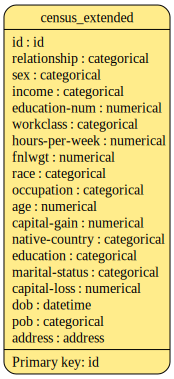

In [24]:
metadata.visualize()

## 3. Creating the synthesizer

Create the synthesizer using the CTGAN algorithm':

In [25]:
synthesizer = CTGANSynthesizer(metadata)

Train the synthesizer using the real data (`real_data`):

In [ ]:
start_time = time.time()
synthesizer.fit(
    data=real_data
)
end_time = time.time()
execution_time = end_time - start_time
minutes = int(execution_time // 60)
seconds = execution_time % 60

print(f"Training time: {minutes} minutes and {seconds:.2f} seconds")

Computed loss values for each epoch for both the generator and discriminator:

In [27]:
synthesizer.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,1.765080,-0.439242
1,1,0.698990,0.237745
2,2,0.905653,0.034457
3,3,0.242046,0.237939
4,4,-0.096332,0.356604
...,...,...,...
295,295,-0.622417,-0.174662
296,296,-0.881803,-0.123522
297,297,-1.045070,-0.228918
298,298,-0.849455,-0.026324


Optional visualization of the loss values:

In [28]:

fig = synthesizer.get_loss_values_plot()
fig.show()

## 4. Generate synthetic data

In [29]:
synthetic_data = synthesizer.sample(
    num_rows=5000
)

Compare real data with synthetic data:

In [30]:
real_data[5:10]
synthetic_data.head()

,id,relationship,sex,income,education-num,workclass,hours-per-week,fnlwgt,race,occupation,age,capital-gain,native-country,education,marital-status,capital-loss,dob,pob,address
0,5451002,Husband,Male,<=50K,10,Private,40,30400,White,Transport-moving,29,0,United-States,Some-college,Married-civ-spouse,0,1991-07-12,"Washington, D.C.","37175 Hernandez Corners\nWest Angela, MN 61525"
1,6046429,Husband,Male,<=50K,7,Private,93,380486,White,Other-service,34,0,United-States,Assoc-voc,Married-civ-spouse,1,1990-04-15,"Washington, D.C.","71237 Jessica Parkways Apt. 168\nMccallmouth, ..."
2,11509909,Not-in-family,Male,<=50K,13,Private,60,609822,White,Other-service,25,0,United-States,Bachelors,Never-married,1,1996-10-13,"Washington, D.C.","926 Black Green Apt. 674\nEast Jason, IL 33986"
3,7602670,Not-in-family,Female,>50K,9,Federal-gov,40,44972,Black,Prof-specialty,44,0,United-States,HS-grad,Divorced,0,1971-04-13,"Washington, D.C.","4721 Michael Fork Suite 040\nOliviaberg, KY 60506"
4,5066721,Unmarried,Female,<=50K,13,Private,24,191914,White,Sales,61,0,England,Bachelors,Widowed,0,1968-06-14,Ottawa,"842 Harold Mews Apt. 603\nNorth Sheri, MT 41998"


## 5. Evaluation of real vs. synthetic data

### 5.1 Diagnostic

In [31]:
diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 19/19 [00:00<00:00, 313.92it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 465.05it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



### 5.2 Data quality

In [32]:
quality_report = evaluate_quality(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 19/19 [00:00<00:00, 174.46it/s]|
Column Shapes Score: 88.02%

(2/2) Evaluating Column Pair Trends: |██████████| 171/171 [00:01<00:00, 144.47it/s]|
Column Pair Trends Score: 82.65%

Overall Score (Average): 85.34%



Overview of detailed values:

In [33]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score,Error
0,relationship,TVComplement,0.897716,None
1,sex,TVComplement,0.991595,None
2,income,TVComplement,0.906610,None
3,education-num,KSComplement,0.924318,None
4,workclass,TVComplement,0.934632,None
5,hours-per-week,KSComplement,0.948738,None
6,fnlwgt,KSComplement,0.945970,None
7,race,TVComplement,0.925783,None
8,occupation,TVComplement,0.845647,None
9,age,KSComplement,0.931438,None


### 5.3 Anonymization

The original dataset included some sensitive columns such as residential address or place of birth. In the synthetic data, these columns are fully anonymized – they contain entirely fake values that match the format of the original data.

In [34]:
sensitive_column_names = ['dob', 'pob', 'address']
real_data[sensitive_column_names].head()
synthetic_data[sensitive_column_names].head()

,dob,pob,address
0,1991-07-12,"Washington, D.C.","37175 Hernandez Corners\nWest Angela, MN 61525"
1,1990-04-15,"Washington, D.C.","71237 Jessica Parkways Apt. 168\nMccallmouth, ..."
2,1996-10-13,"Washington, D.C.","926 Black Green Apt. 674\nEast Jason, IL 33986"
3,1971-04-13,"Washington, D.C.","4721 Michael Fork Suite 040\nOliviaberg, KY 60506"
4,1968-06-14,Ottawa,"842 Harold Mews Apt. 603\nNorth Sheri, MT 41998"


### 5.4 Visualization of the data

Age distribution in real and synthetic data:

In [35]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='age',
    metadata=metadata
)
fig.show()

Distribution of years of education in real and synthetic data:

In [36]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='education-num',
    metadata=metadata
)
fig.show()

Distribution of marital status in real and synthetic data:

In [37]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='marital-status',
    metadata=metadata
)
fig.show()

Correlation between type of employment and years of education:

In [38]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['education-num', 'occupation'],
    metadata=metadata
)
fig.show()

Correlation between ethnicity and years of education:

In [39]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['education-num', 'race'],
    metadata=metadata
)
fig.show()

Correlation between income and years of education:

In [40]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['education-num', 'income'],
    metadata=metadata
)
fig.show()